In [1]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
import sklearn as sk
import tensorflow as tf

In [4]:
#default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [19]:
#importing dataset
dataLabelled =  pd.read_csv('breast-cancer-wisconsin.data', sep=",", header=None, names=['id','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class'])
print(dataLabelled)


          id  clump_thickness  uniformity_of_cell_size  \
0    1000025                5                        1   
1    1002945                5                        4   
2    1015425                3                        1   
3    1016277                6                        8   
4    1017023                4                        1   
..       ...              ...                      ...   
694   776715                3                        1   
695   841769                2                        1   
696   888820                5                       10   
697   897471                4                        8   
698   897471                4                        8   

     uniformity_of_cell_shape  marginal_adhesion  single_epithelial_cell_size  \
0                           1                  1                            2   
1                           4                  5                            7   
2                           1                  1            

In [12]:
# checking the types of features
dataLabelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_of_cell_size      699 non-null    int64 
 3   uniformity_of_cell_shape     699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [14]:
dataLabelled.shape

(699, 11)

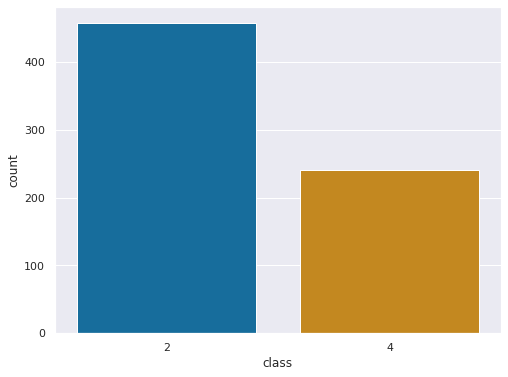

In [17]:
#plotting the benign and malicioud diagnosis 
plt.figure(figsize = (8,6))
sns.countplot(x = 'class', data = dataLabelled)

In [ ]:
# Getting the value count for the two labels in the diagnosis column
value_count = dataLabelled['class'].value_counts() 

# Setting the figure size of the plot 
plt.figure(figsize = (18, 7))

# Plotting the Count for the value counts in the diagnosis column
value_count.plot(kind = "bar", color = "brown", rot=0)
plt.ylabel("Counts")
plt.title("A bar chart showing the count of Benign and Malignant Labels")
plt.grid(True)
plt.show() 

# Plotting a pie chart of the imbalanced dataset 
value_count.plot(kind = "pie", figsize=(18, 7))
plt.title("A Pie Chart showing the count of Benign and Malignant Labels")
plt.show() 

# Printing the number of counts for the values of the labels in the diagnosis column 
B, M = value_count 
print("Number of Benign: {}".format(B))
print("Number of Malignant: {}".format(M))

In [ ]:
#creating a confusion matrix
# plt.figure(figsize=(16,14))
# sns.heatmap(dataLabelled.corr(), cmap='Greens', annot = True)
# plt.title("Correlation Map", fontweight = "bold", fontsize=16)

#defining dependent and independent variables
# x = dataLabelled.drop('class', axis=1)
# y = dataLabelled['class']

# Select upper triangle of correlation matrix
# upper = dataLabelled.corr().where(np.triu(np.ones(dataLabelled.corr().shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
#print(to_drop)
# Drop features 
#dataLabelled.drop(to_drop, axis=1, inplace=True)

corr = dataLabelled.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of df Features', y=1.05, size=15)

In [ ]:
#defining dependent and independent variables
x = dataLabelled.drop('class', axis=1)
y = dataLabelled['class']

In [ ]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)
# Drop features 
dataLabelled.drop(to_drop, axis=1, inplace=True)

In [ ]:
len(dataLabelled.columns)

In [ ]:
dataLabelled.isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder
#creating the object
lb = LabelEncoder()
y = lb.fit_transform(y)

In [ ]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [ ]:
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
from tensorflow.keras.layers import BatchNormalization
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann =Sequential()

#ADDING FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

#ADDING 2ND HIDDEN LAYER WITH 30 NEURONS
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

#ADDING OUTPUT LAYER WITH 1 NEURON , AS THIS IS A BINARY CLASSIFICATION
ann.add(Dense(units = 1,activation = 'sigmoid'))